In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 로드
data = pd.read_csv('./../../Fed1_dataset/Interest_rate_prediction.csv')
df = data.copy()

# 금리가 5.5 이상이면 '1'(경기 침체), 미만이면 '0'(경기 회복)
df['Target'] = (df['DFEDTARU'] >= 5.5).astype(int)

# 숫자형 데이터만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 독립 변수(X)와 종속 변수(y) 설정
X = numeric_df.drop(columns=['Target', 'DFEDTARU'])
y = numeric_df['Target']

# 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# MLP 모델 구축
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


C:\Users\kimjuseong\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7992 - loss: 0.6023 - val_accuracy: 0.8333 - val_loss: 0.6239
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9298 - loss: 0.5182 - val_accuracy: 0.8667 - val_loss: 0.5326
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9600 - loss: 0.4226 - val_accuracy: 0.8667 - val_loss: 0.4611
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9590 - loss: 0.3598 - val_accuracy: 0.8667 - val_loss: 0.3959
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9465 - loss: 0.3201 - val_accuracy: 0.8667 - val_loss: 0.3378
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9298 - loss: 0.2923 - val_accuracy: 0.8667 - val_loss: 0.2869
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9298 - loss: 0.2422 - val_accuracy: 0.8667 - val_loss: 0.2449
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9563 - loss: 0.2011 - val_accuracy: 0.9000 - val_loss: 0.2131
Epoch 9/20
4/4 ━

In [3]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# 예측 결과
y_pred = (model.predict(X_test) > 0.5).astype(int)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9720 - loss: 0.0678 
Test Loss: 0.06436610221862793
Test Accuracy: 0.9736841917037964
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


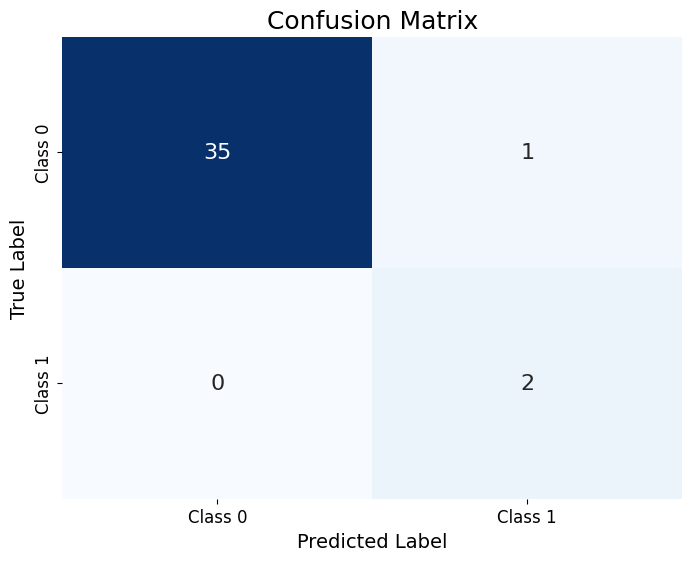

Classification Report:
              precision    recall  f1-score    support
Class 0        1.000000  0.972222  0.985915  36.000000
Class 1        0.666667  1.000000  0.800000   2.000000
accuracy       0.973684  0.973684  0.973684   0.973684
macro avg      0.833333  0.986111  0.892958  38.000000
weighted avg   0.982456  0.973684  0.976130  38.000000


In [6]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], fontsize=12)
plt.show()

# 분류 보고서 출력 
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# 보고서를 DataFrame으로 변환
import pandas as pd
report_df = pd.DataFrame(report).transpose()

# 보고서 출력
print("Classification Report:")
print(report_df.to_string())

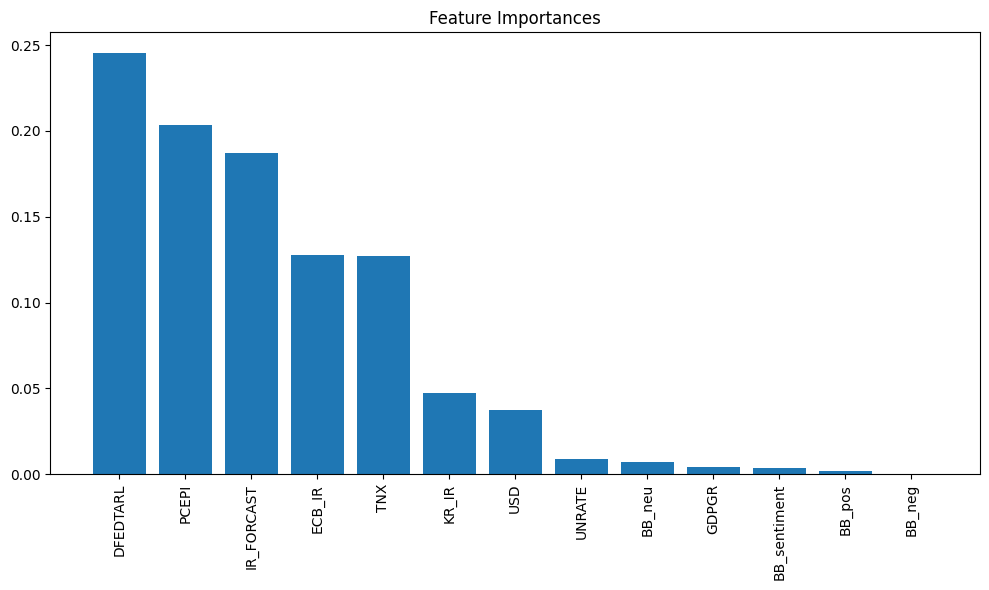

In [5]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델을 학습하여 특성 중요도 계산
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 특성 중요도 시각화
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()